In [62]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [63]:
#Reading in data
#Assuming data is cleaned and ready to model
#Change to your files of interest
##Choose one df
#file_name_csv = 'titanic.csv'
file_name_xlsx = 'AirQualityUCI copy.xlsx'
#df = pd.read_csv(file_name_csv)
df = pd.read_excel(file_name_xlsx)

In [64]:
#Creating new dataset with columns/features of interest plus their labels
#Create array of column names of interest
##The last column should be the column of labels
cols_of_interest = ['T', 'RH', 'AH', 'NO2(GT)', 'NOx(GT)']

#Creating new df with only those cols
new_df = df[cols_of_interest]

In [65]:
#dropping missing values (if applicable)
new_df = new_df.dropna()

In [66]:
#seperating into data and labels
data_col = cols_of_interest[0:-1]
label_col = cols_of_interest[len(cols_of_interest)-1]

#creating data and label df's
data = new_df[data_col]
labels = new_df[label_col]

In [67]:
#splitting into training and testing set
train_data, test_data, train_label, test_label = train_test_split(data, labels)

In [68]:
###LOGISTIC REGRESSION###
LR_model = LinearRegression()

In [69]:
#Fitting training data and predicting with test data
LR_model.fit(train_data, train_label)
LR_pred = LR_model.predict(test_data)

In [70]:
#printing r^2 value
LR_R2 = r2_score(test_label, LR_pred)
print(LR_R2)

0.6993344692712581


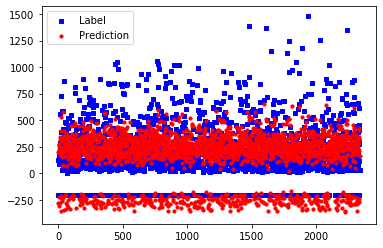

In [71]:
#Plotting relationship of actual labels and predicted labels
x1 = range(len(test_label))
x2 = range(len(LR_pred))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x1, test_label, s=10, c='b', marker="s", label='Label')
ax.scatter(x2,LR_pred, s=10, c='r', marker="o", label='Prediction')
plt.legend(loc='upper left');
plt.show()

In [72]:
###KNN MODEL###
KNN_model = KNeighborsRegressor()

In [73]:
#fitting and predicting data
KNN_model.fit(train_data, train_label)
KNN_pred = KNN_model.predict(test_data)

In [74]:
#printing r^2 value
KNN_R2 = r2_score(test_label, KNN_pred)
print(KNN_R2)

0.840036743853073


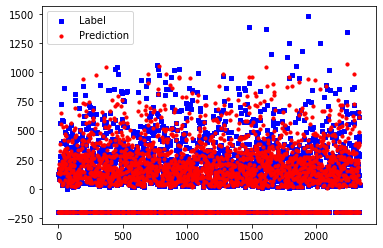

In [75]:
#Plotting relationship of actual labels and predicted labels
x1 = range(len(test_label))
#the predictions arrays will be the same length no matter the model
x2 = range(len(LR_pred))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x1, test_label, s=10, c='b', marker="s", label='Label')
ax.scatter(x2,KNN_pred, s=10, c='r', marker="o", label='Prediction')
plt.legend(loc='upper left');
plt.show()

In [76]:
###SVR MODEL###
SVR_model = LinearSVR()

In [77]:
#fitting and predicting data
SVR_model.fit(train_data, train_label)
SVR_pred = SVR.predict(test_data)

/Users/kayladuarte/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NameError: name 'SVR' is not defined

In [ ]:
#printing r^2 value
SVR_R2 = r2_score(test_label, SVR_pred)
print(SVR_R2)

In [ ]:
#Plotting relationship of actual labels and predicted labels
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x1, test_label, s=10, c='b', marker="s", label='Label')
ax.scatter(x2,SVR_pred, s=10, c='r', marker="o", label='Prediction')
plt.legend(loc='upper left');
plt.show()

In [ ]:
###DECISION TREE###
tree_model = DecisionTreeRegressor()

In [ ]:
#fitting and testing model
tree_model.fit(train_data, train_label)
tree_pred = tree_model.predict(test_data)

In [ ]:
#printing r^2 value
tree_R2 = r2_score(test_label, tree_pred)
print(tree_R2)

In [ ]:
#Plotting relationship of actual labels and predicted labels
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x1, test_label, s=10, c='b', marker="s", label='Label')
ax.scatter(x2,tree_pred, s=10, c='r', marker="o", label='Prediction')
plt.legend(loc='upper left');
plt.show()

In [ ]:
##Determining best model for the data
#Taking the max of the R^2 values
r2_vals = [LR_R2, KNN_R2, SVR_R2, tree_R2]
model_names = ['Logistic Regression', 'KNN', 'SVR', 'Decision Tree']
best_model = r2_vals.max()

#creating loop to pull out name and r^2 value
i = 0
index_best_model = []
for val in r2_vals:
    if val == best_model:
        index_best_model = i
    i+=1

In [ ]:
#printing results
print('The best model to use is ' + model_names[index_best_model] + ' with an R^2 = ' + str(best_model))
